# Breast Cancer Classification

Instituto de Computação - Unicamp  
2018

## Classificação binária (decisão)

In [13]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np

from __future__ import print_function

%matplotlib inline

In [14]:
dataset = load_breast_cancer()
x_train, x_test, y_train, y_test = train_test_split(dataset.data, dataset.target,
                                                    test_size=0.25,
                                                    random_state=42)

print(dataset.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [15]:
print ('1:', np.count_nonzero(dataset.target == 1))
print ('0:', np.count_nonzero(dataset.target == 0))

1: 357
0: 212


Gráfico exibindo as duas primeiras características do sub-conjunto de treino:


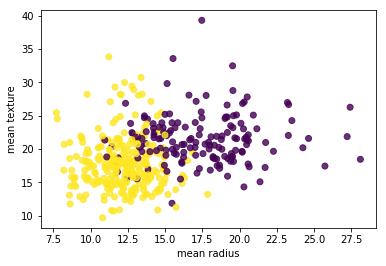

In [16]:
print('Gráfico exibindo as duas primeiras características do sub-conjunto de treino:')
_ = plt.scatter(x_train[:, 0], x_train[:, 1],
                c=y_train,
                alpha=0.8)
_ = plt.xlabel(dataset.feature_names[0])
_ = plt.ylabel(dataset.feature_names[1])

In [17]:
estimators = [SVC(random_state=13), LogisticRegression(random_state=24)]

for e in estimators:
    print('Treinando estimator', type(e).__name__)
    e.fit(x_train, y_train)

print('Todos os estimatores foram treinados!')

Treinando estimator SVC
Treinando estimator LogisticRegression
Todos os estimatores foram treinados!


### Qual dos dois estimadores apresenta menor taxa de erro sobre o conjunto WDBC teste?

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
print ('treino:')
for e in estimators:
    print('Teste do estimator', type(e).__name__)
    y_pred = e.predict(x_train)
    error_rate = (1 - accuracy_score(y_train, y_pred))
    print (type(e).__name__ + ' error (%):', error_rate * 100)

treino:
Teste do estimator SVC
SVC error (%): 0.0
Teste do estimator LogisticRegression
LogisticRegression error (%): 4.225352112676061


In [20]:
print ('teste:')
for e in estimators:
    print('Teste do estimator', type(e).__name__)
    y_pred = e.predict(x_test)
    error_rate = (1 - accuracy_score(y_test, y_pred))
    print (type(e).__name__ + ' error (%):', error_rate * 100)

teste:
Teste do estimator SVC
SVC error (%): 37.76223776223776
Teste do estimator LogisticRegression
LogisticRegression error (%): 4.1958041958041985


O estimador Regressão Logística apresenta um erro bem menor (4.2%) do que SVC (37%.8)

In [21]:
print('exemplo de rótulos de treino verdadeiros:', y_test[:10], '...')
print('exemplo de rótulos de treino preditos:', y_train[:10], '...')

exemplo de rótulos de treino verdadeiros: [1 0 0 1 1 0 0 0 1 1] ...
exemplo de rótulos de treino preditos: [1 0 1 0 0 0 1 0 1 1] ...


In [22]:
print ('frequencies:')
print ('size:', len(y_test))
print ('1 - benigno:', np.count_nonzero(y_test == 1))
print ('0 - maligno:', np.count_nonzero(y_test == 0))

frequencies:
size: 143
1 - benigno: 89
0 - maligno: 54


- Algum dos estimatores super-especificou sobre o conjunto de treinamento?

R: O SVC deu overfit (super-especificou), pois o erro no treino foi de 0% e no teste foi 37%. - "chutou tudo 1"
Ja para o regressao logistica, nao teve overfit.

- Quantas vezes cada um dos estimadores errou, no conjunto de teste?

### Os estimadores conseguem distinguir ambas as classes de forma satisfatória?

Utilize uma ou mais funções vistas em aula para descobrir se os classificadores efetivamente conseguem distinguir amostras benignas de malignas.

Resposta:
O classificador SVC apresenta resultados muito piores do que o classificador Regressão Logística.
O SVC não consegue distinguir bem amostras benifnas e malignas, pois sua especificidade é 1 (100%) enquanto a especificidade é 0 (0%). Ou seja, sua taxa de acerto para a classe positiva (1 - benigno) é muito maior que a taxa acerto para a classe negativa (0 - negativo). Dentro do escopo do problema, isso significa que o classificador acerta bastante para amostras benignas, mas erra bastante para classes malignas. A acurácia normalizada é igual a 0,5 (50%) e o f1 score é 0,77 (77%).

Já o classificador Regressão Logística possui tanto a sensibilidade (0,97) quanto a especificidade (0,92) altas. Ou seja, tanto a taxa de acerto para a classe positiva quanto a taxa acerto para a classe negativa são altos. Isso significa que o classificador acerta bastante tanto para amostras benignas quanto malignas. A acurácia normalizada é igual a 0,97 (97%) e o f1 score é 0,95 (95%).

In [23]:
for e in estimators:
    y_pred = e.predict(x_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    error_rate = (1 - accuracy)

    cm = metrics.confusion_matrix(y_test, y_pred)
    f1score = metrics.f1_score(y_test, y_pred)
    
    #sensitivity ou recall (true positive rate)
    tpr = (cm[1][1] / (cm[1][1] + cm[1][0]))
    
    #specificity (true negative rate)
    tnr = (cm[0][0] / (cm[0][0] + cm[0][1]))
    
    acc_norm = (tpr + tnr)/2
    
    print('Estimator {} - results:\n*************'.format(type(e).__name__))
    print ('accuracy:', accuracy)
    print ('error:', error_rate)
    print ('true positive rate, sensitivity or recall:', tpr)
    print ('true negative rate or specificity:', tnr)
    print ('normalized accuracy:', acc_norm)
    print ('f1 score:', f1score)
    print ('cm:', cm)
    print ("*************")

Estimator SVC - results:
*************
accuracy: 0.6223776223776224
error: 0.3776223776223776
true positive rate, sensitivity or recall: 1.0
true negative rate or specificity: 0.0
normalized accuracy: 0.5
f1 score: 0.7672413793103448
cm: [[ 0 54]
 [ 0 89]]
*************
Estimator LogisticRegression - results:
*************
accuracy: 0.958041958041958
error: 0.04195804195804198
true positive rate, sensitivity or recall: 0.9775280898876404
true negative rate or specificity: 0.9259259259259259
normalized accuracy: 0.9517270079067832
f1 score: 0.9666666666666667
cm: [[50  4]
 [ 2 87]]
*************


As pontuações mudam quando consideramos a frequência das classes?


Ao considerar a acurácia normalizada ao invés da acurácia simples, a pontuação cai de 0.62 para 0,5 usando o classificador SVC e aumenta de 0,96 pra 0,98 usando o classificador Regressão Logística.

### Apresente um relatório das principais métricas para ambos estimadores

In [24]:
for e in estimators:
    y_pred = e.predict(x_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    error_rate = (1 - accuracy)
    precision = metrics.precision_score(y_test, y_pred)

    cm = metrics.confusion_matrix(y_test, y_pred)
    f1score = metrics.f1_score(y_test, y_pred)

    
    #sensitivity ou recall
    tpr = (cm[1][1] / (cm[1][1] + cm[1][0]))
    
    #specificity
    tnr = (cm[0][0] / (cm[0][0] + cm[0][1]))
    
    acc_norm = (tpr + tnr)/2
    
    print('Estimator {} - resultados:\n*************'.format(type(e).__name__))
    print ('accuracy:', accuracy)
    print ('error:', error_rate)
    print ('true positive rate, sensitivity or recall:', tpr)
    print ('true negative rate or specificity:', tnr)
    print ('precision:', precision)
    print ('normalized accuracy:', acc_norm)
    print ('f1 score:', f1score)
    print ('cm:', cm)
    print ("*************")

Estimator SVC - resultados:
*************
accuracy: 0.6223776223776224
error: 0.3776223776223776
true positive rate, sensitivity or recall: 1.0
true negative rate or specificity: 0.0
precision: 0.6223776223776224
normalized accuracy: 0.5
f1 score: 0.7672413793103448
cm: [[ 0 54]
 [ 0 89]]
*************
Estimator LogisticRegression - resultados:
*************
accuracy: 0.958041958041958
error: 0.04195804195804198
true positive rate, sensitivity or recall: 0.9775280898876404
true negative rate or specificity: 0.9259259259259259
precision: 0.9560439560439561
normalized accuracy: 0.9517270079067832
f1 score: 0.9666666666666667
cm: [[50  4]
 [ 2 87]]
*************


Qual estimador possui melhor *f-1 score*?

Resposta:
O estimador Regressão Logística possui um f1 score, com o valor de 0,96 (96%).
Já o SVC apresenta um f1 score de 0,77 (77%).